# Simple Linear Regression

##### In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

In [1]:
#supress warning
import warnings
warnings.filterwarnings('ignore')

#Import Libraries
import numpy as np
import pandas as pd

#For Visulization
import matplotlib.pyplot as plt 
import seaborn as sns

#ML Algorthims
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Reading Data

In [2]:
Simple_linear_df = pd.read_csv('advertising.csv')

In [3]:
Simple_linear_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


##### Let's inspect the various aspects of our dataframe

In [4]:
Simple_linear_df.shape

(200, 4)

In [5]:
Simple_linear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
Simple_linear_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

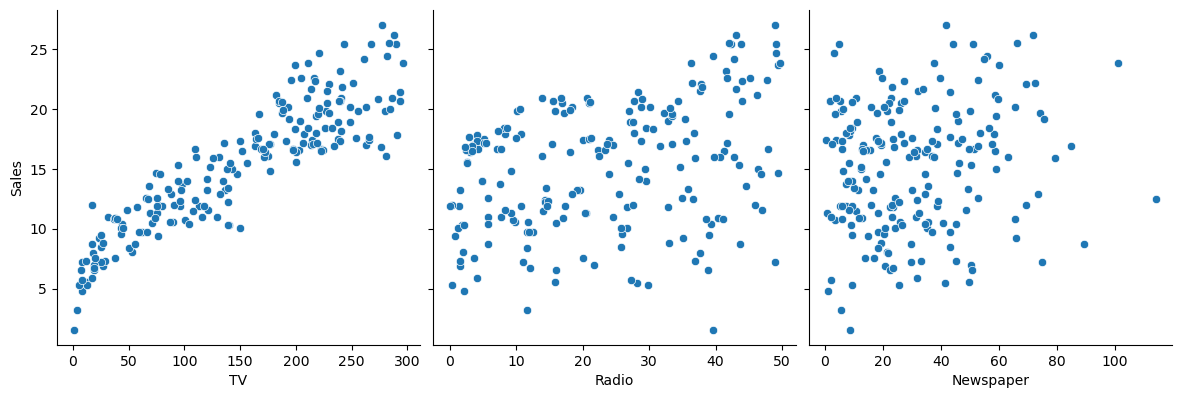

In [7]:
sns.pairplot(Simple_linear_df, x_vars=['TV','Radio','Newspaper'], y_vars= 'Sales', size=4, aspect= 1, kind='scatter')
plt.show()

In [8]:
Simple_linear_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

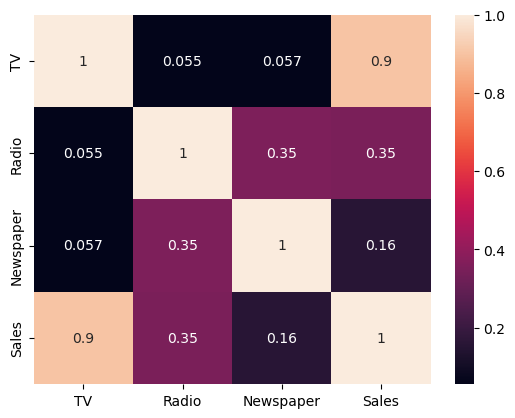

In [9]:
sns.heatmap(Simple_linear_df.corr(), annot= True)

## Step 3: Performing Simple Linear Regression

Steps:
- Create X and y
- Create train and test data sets (70 - 30, 80 - 20)
- Train your model on training sets (i.e learn the coefficients)
- Evaluate the model(training set, test set)

In [10]:
# Create X and y
X = Simple_linear_df['TV']
y = Simple_linear_df['Sales']

In [11]:
# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)
X_train.shape

(140,)

In [12]:
y_train.shape

(140,)

In [13]:
X_test.shape

(60,)

In [14]:
y_train.shape

(140,)

In [15]:
#Training the model
#Little adjustment need to use to use stats model
#adding constant for stats model no reason
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [16]:
# y = c + m1 * X1
# y = c* const + m1 * TV

In [17]:
#Fitting the model
#Ordinary Least square method
LR = sm.OLS(y_train, X_train_sm)
LR_model = LR.fit()
LR_model.params

const    6.948683
TV       0.054546
dtype: float64

#### Sales = 6.94 + 0.05 * TV (Coffecients)

In [18]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.52e-52
Time:                        22:51:28   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sklearn will not give p-values. 
Stats model is prefered by people in stastics background.
Sklearn model is prefered by people in programing background.

#### Looking at some key statistics from the summary
- The values we are concerned with are -

- The coefficients and significance (p-values)
- R-squared
- F statistic and its significance
- 1. The coefficient for TV is 0.054, with a very low p value
- The coefficient is statistically significant. So the association is not purely by chance.

- 2. R - squared is 0.816
- Meaning that 81.6% of the variance in Sales is explained by TV

- This is a decent R-squared value.

- 3. F statistic has a very low p value (practically low)
- Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

In [19]:
y_train_pred = LR_model.predict(X_train_sm)

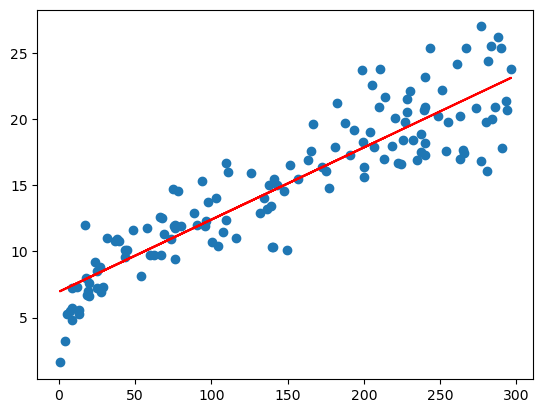

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

## Step 4: Residual analysis

In [21]:
# error = f(y_train, y_train_pred)

In [22]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [23]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

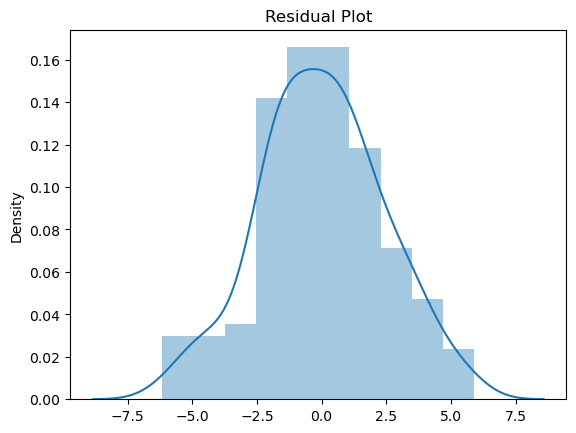

In [24]:
#plot the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

#### look for patterns 
- errors are nomally distributed
- We should not identify any sorted patterns

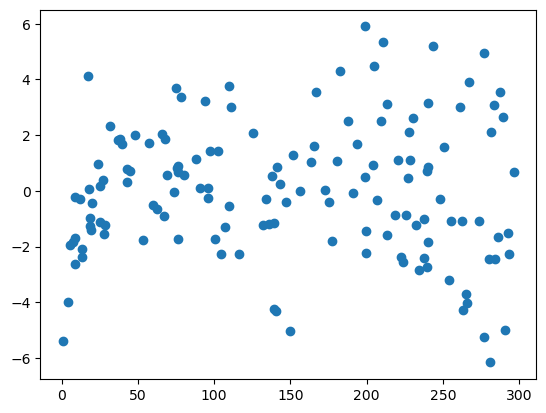

In [25]:
plt.scatter(X_train, res)

The residuals are normally distributed, and there are no visible patterns in the error terms (except for the fact that the variance seems to be increasing a little for the higher values). So, this model fit looks good. Let's go ahead and make predictions on the test set.

## Step 5: Predictions and Evaluation on the Test Set 

In [26]:
# predictions on the test set (y_test_pred)
# evaluate the model, r-squared, on the test

In [27]:
#add a constant/intercet to the test
X_test_sm = sm.add_constant(X_test)

# predictions on the test set
y_test_pred = LR_model.predict(X_test_sm)

In [28]:
# evaluate the model, r-squared, on the test
# r-squared
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7921031601245659

In [29]:
# r2 on train
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8157933136480389

*Any value within 5% of the train data set is acceptable

In [30]:
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826953

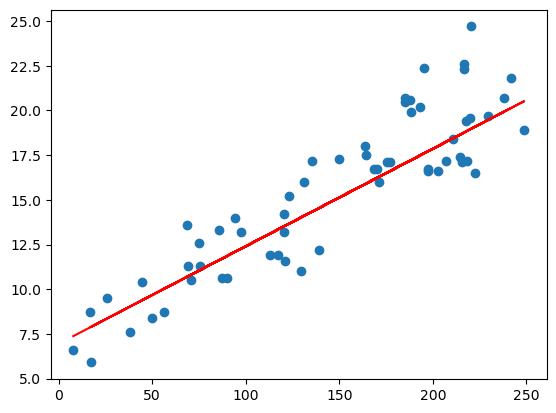

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Benificts of Stats model is that we get nice summary

## Linear Regression Using sklearn

sklearn is goto library for the regression model

Steps in sklearn model building

1. create an object of linear regression

2. fit the model

3. see the params, make predictions (train, test)

4. Evaluate (r2, REMS, etc)

In [34]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [40]:
# reshape X_train to (n,1)
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [42]:
# create an object of linear regression
LM = LinearRegression()

# fit the model
LM.fit(X_train_lm, y_train)

LinearRegression()

In [43]:
#see the params, make predictions (train, test)
print(LM.coef_)
print(LM.intercept_)

[0.05454575]
6.948683200001357


In [45]:
# Make the Prediction
y_train_pred_pred = LM.predict(X_train_lm)
y_test_pred = LM.predict(X_test_lm)

In [46]:
# Evaluate the model
print(r2_score(y_true = y_test, y_pred = y_test_pred))
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.7921031601245662
0.8157933136480389


## Conclusion

The Linear regression model within the 5% of the training set is acceptable.
As shown above the model is consider as fit 